In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start='2012-01-01'
end='2022-12-21'
stock='GOOG'
data=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800


In [8]:
data.reset_index(inplace=True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [12]:
ma_100_days=data.Close.rolling(100).mean()

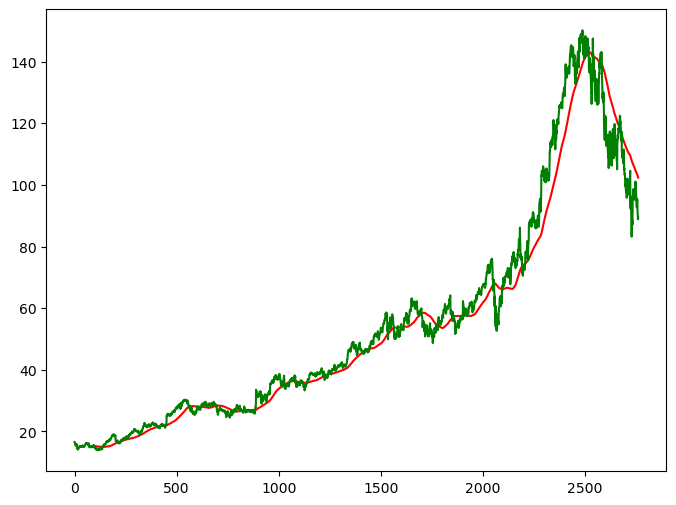

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [16]:
ma_200_days=data.Close.rolling(200).mean()

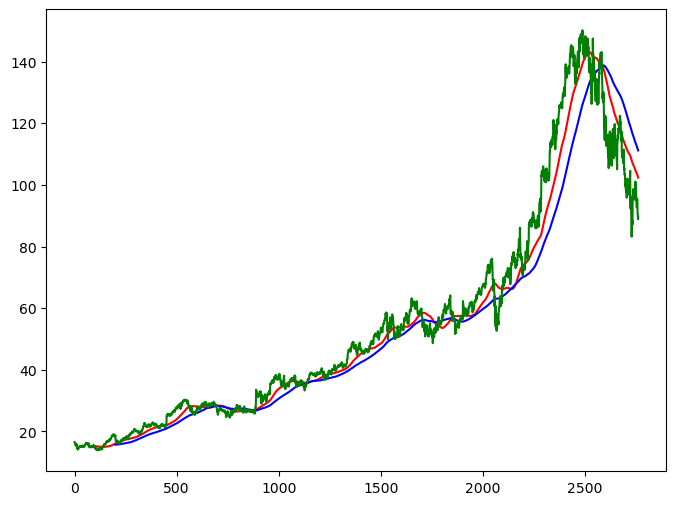

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [20]:
data.dropna(inplace=True)

In [22]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [24]:
data_train.shape[0]

2208

In [26]:
data_test.shape[0]

553

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [29]:
data_train_scale=scaler.fit_transform(data_train)

In [30]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
x=np.array(x)

In [38]:
model=Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(x,y, epochs=50,batch_size=32, verbose=1)

IndexError: tuple index out of range

In [48]:
import numpy as np

# Ensure x and y are numpy arrays
x = np.array(x)
y = np.array(y)

# Check shape
print(f"x shape: {x.shape}")  # Expected: (samples, timesteps, features)
print(f"y shape: {y.shape}")  # Expected: (samples, 1)

# Reshape if necessary
if len(x.shape) == 2:  # Missing features dimension
    x = x.reshape((x.shape[0], x.shape[1], 1))

if len(y.shape) == 1:  # Make sure y is 2D
    y = y.reshape(-1, 1)

print(f"Reshaped x: {x.shape}")
print(f"Reshaped y: {y.shape}")

# Train model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)


x shape: (2108, 100, 1)
y shape: (2108,)
Reshaped x: (2108, 100, 1)
Reshaped y: (2108, 1)
Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - loss: 0.0633
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 407ms/step - loss: 0.0070
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 418ms/step - loss: 0.0069
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 411ms/step - loss: 0.0063
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 413ms/step - loss: 0.0054
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 408ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 415ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 413ms/step - loss: 0.0043
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 414ms/step - loss: 0.0048
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 368ms/step - loss: 0.0043
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 371ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 381ms/step - loss: 0.0040
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 389ms/step - loss: 0.0038
Epoch 14/50
66/66 ━━━━

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [54]:
pas_100_days=data_train.tail(100)

In [56]:
data_test=pd.concat([pas_100_days,data_test], ignore_index=True)

In [58]:
data_test

Ticker,GOOG
0,70.084183
1,69.888878
2,70.268517
3,70.597328
4,70.638184
...,...
648,94.968765
649,90.873482
650,90.534698
651,88.830818


In [60]:
data_test_scale=scaler.fit_transform(data_test)

In [64]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [66]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


In [68]:
y_predict

array([[0.12475669],
       [0.12501843],
       [0.12586665],
       [0.12737   ],
       [0.12950121],
       [0.13219509],
       [0.13526762],
       [0.13853477],
       [0.14190286],
       [0.14535901],
       [0.14896715],
       [0.1526815 ],
       [0.15644118],
       [0.16001318],
       [0.16322032],
       [0.1660518 ],
       [0.1685832 ],
       [0.17098251],
       [0.17358905],
       [0.17668389],
       [0.18046567],
       [0.18506186],
       [0.19044416],
       [0.19650906],
       [0.20303315],
       [0.20977497],
       [0.21657935],
       [0.22327462],
       [0.22958945],
       [0.23537652],
       [0.24048233],
       [0.24473695],
       [0.24812716],
       [0.2507411 ],
       [0.25276732],
       [0.25432405],
       [0.2555963 ],
       [0.25691584],
       [0.25857362],
       [0.260785  ],
       [0.26360613],
       [0.26695776],
       [0.27056968],
       [0.27421504],
       [0.27758372],
       [0.28039166],
       [0.28236032],
       [0.283

In [74]:
scale=1/scaler.scale_

In [76]:
y_predict=y_predict*scale

In [78]:
y=y*scale

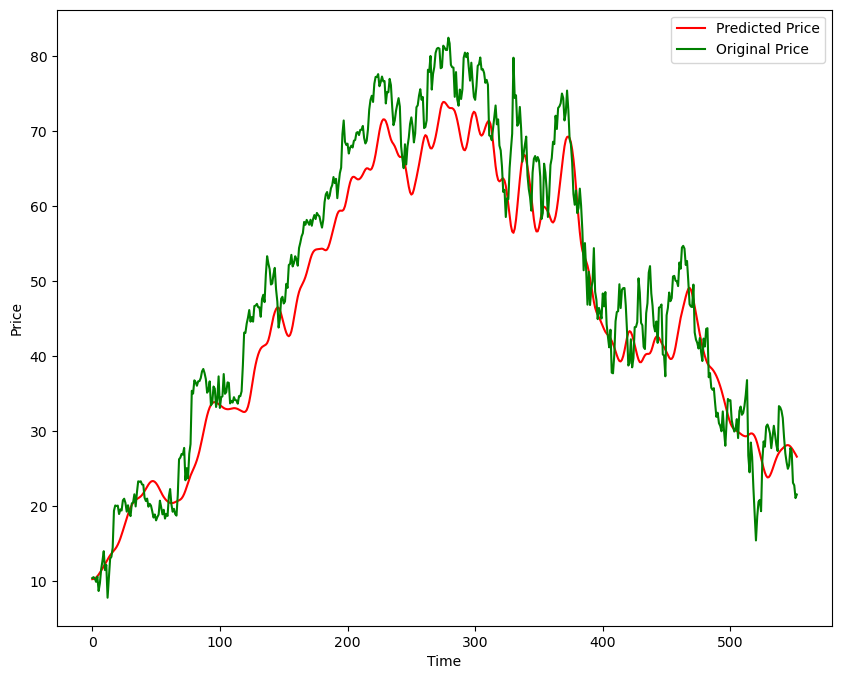

In [82]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
model.save('Stock Predictions Model.keras')